In [1]:
from config import *


In [2]:
print(f"{year}-{month:02}")

2020-10


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
#from map_wrapper import *
#from mpl_toolkits.basemap import Basemap

In [6]:
conn=db.get_conn()

In [7]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from jobs where year_month={year}{month:02} and monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [8]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [9]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['job_description']
del data['job_id']

In [10]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [11]:
data_city=get_sub_stats_by_col(data,'city')
data_city['排名']=list(range(1,data_city.shape[0]+1))
data_city=data_city[['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比']]
data_city.style.format(data_format)

,排名,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
13,1,北京,19208,7000,17000,45000,28911,8.91%
0,2,上海,17765,7000,16500,40000,58319,17.98%
2,3,深圳,17042,7000,15000,37500,52566,16.20%
5,4,杭州,16111,7000,14583,37500,18854,5.81%
10,5,广州,14095,5833,12500,30000,34954,10.77%
1,6,南京,13898,6000,12500,27500,17649,5.44%
14,7,东莞,13502,5250,12500,25000,4003,1.23%
8,8,苏州,13072,5500,12500,27152,9627,2.97%
3,9,成都,12617,3750,12000,30000,17567,5.41%
20,10,厦门,12417,4169,12000,22500,2226,0.69%


In [12]:
def describe(data_city, career):
    for index, row in data_city.iterrows():
        print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

In [13]:
career='软件工程师'
for index, row in data_city.iterrows():
    print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

2020年10月北京招收软件工程师28911人。2019年10月北京软件工程师平均工资19208元，工资中位数17000元，其中95%的人的工资介于7000元到45000元。

2020年10月上海招收软件工程师58319人。2019年10月上海软件工程师平均工资17765元，工资中位数16500元，其中95%的人的工资介于7000元到40000元。

2020年10月深圳招收软件工程师52566人。2019年10月深圳软件工程师平均工资17042元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年10月杭州招收软件工程师18854人。2019年10月杭州软件工程师平均工资16111元，工资中位数14583元，其中95%的人的工资介于7000元到37500元。

2020年10月广州招收软件工程师34954人。2019年10月广州软件工程师平均工资14095元，工资中位数12500元，其中95%的人的工资介于5833元到30000元。

2020年10月南京招收软件工程师17649人。2019年10月南京软件工程师平均工资13898元，工资中位数12500元，其中95%的人的工资介于6000元到27500元。

2020年10月东莞招收软件工程师4003人。2019年10月东莞软件工程师平均工资13502元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年10月苏州招收软件工程师9627人。2019年10月苏州软件工程师平均工资13072元，工资中位数12500元，其中95%的人的工资介于5500元到27152元。

2020年10月成都招收软件工程师17567人。2019年10月成都软件工程师平均工资12617元，工资中位数12000元，其中95%的人的工资介于3750元到30000元。

2020年10月厦门招收软件工程师2226人。2019年10月厦门软件工程师平均工资12417元，工资中位数12000元，其中95%的人的工资介于4169元到22500元。

2020年10月武汉招收软件工程师18893人。2019年10月武汉软件工程师平均工资12204元，工资中位数11500元，其中95%的人的工资介于5250元到25000元。

2020年10月长沙招收软件工程师7553人。2

In [14]:
describe(data_city,'软件工程师')

2020年10月北京招收软件工程师28911人。2019年10月北京软件工程师平均工资19208元，工资中位数17000元，其中95%的人的工资介于7000元到45000元。

2020年10月上海招收软件工程师58319人。2019年10月上海软件工程师平均工资17765元，工资中位数16500元，其中95%的人的工资介于7000元到40000元。

2020年10月深圳招收软件工程师52566人。2019年10月深圳软件工程师平均工资17042元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年10月杭州招收软件工程师18854人。2019年10月杭州软件工程师平均工资16111元，工资中位数14583元，其中95%的人的工资介于7000元到37500元。

2020年10月广州招收软件工程师34954人。2019年10月广州软件工程师平均工资14095元，工资中位数12500元，其中95%的人的工资介于5833元到30000元。

2020年10月南京招收软件工程师17649人。2019年10月南京软件工程师平均工资13898元，工资中位数12500元，其中95%的人的工资介于6000元到27500元。

2020年10月东莞招收软件工程师4003人。2019年10月东莞软件工程师平均工资13502元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年10月苏州招收软件工程师9627人。2019年10月苏州软件工程师平均工资13072元，工资中位数12500元，其中95%的人的工资介于5500元到27152元。

2020年10月成都招收软件工程师17567人。2019年10月成都软件工程师平均工资12617元，工资中位数12000元，其中95%的人的工资介于3750元到30000元。

2020年10月厦门招收软件工程师2226人。2019年10月厦门软件工程师平均工资12417元，工资中位数12000元，其中95%的人的工资介于4169元到22500元。

2020年10月武汉招收软件工程师18893人。2019年10月武汉软件工程师平均工资12204元，工资中位数11500元，其中95%的人的工资介于5250元到25000元。

2020年10月长沙招收软件工程师7553人。2

In [15]:
#draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [16]:
data_blockchain=get_sub_stats_by_col(data[(data['career']=='区块链开发')],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
11,昆明,38800,7000,33500,60000,5,0.69%
8,大连,30000,30000,30000,30000,1,0.14%
9,北京,23328,11700,25000,37000,68,9.43%
3,深圳,22738,8072,22500,35454,139,19.28%
20,苏州,22500,22500,22500,22500,10,1.39%
10,宁波,20833,20833,20833,20833,1,0.14%
14,南京,20727,10000,19667,47500,11,1.53%
1,杭州,20395,11156,21500,47687,57,7.91%
22,东莞,20000,20000,20000,20000,2,0.28%
2,上海,19770,7842,20000,35000,102,14.15%


In [17]:
describe(data_blockchain,'区块链工程师')

2020年10月昆明招收区块链工程师5人。2019年10月昆明区块链工程师平均工资38800元，工资中位数33500元，其中95%的人的工资介于7000元到60000元。

2020年10月大连招收区块链工程师1人。2019年10月大连区块链工程师平均工资30000元，工资中位数30000元，其中95%的人的工资介于30000元到30000元。

2020年10月北京招收区块链工程师68人。2019年10月北京区块链工程师平均工资23328元，工资中位数25000元，其中95%的人的工资介于11700元到37000元。

2020年10月深圳招收区块链工程师139人。2019年10月深圳区块链工程师平均工资22738元，工资中位数22500元，其中95%的人的工资介于8072元到35454元。

2020年10月苏州招收区块链工程师10人。2019年10月苏州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年10月宁波招收区块链工程师1人。2019年10月宁波区块链工程师平均工资20833元，工资中位数20833元，其中95%的人的工资介于20833元到20833元。

2020年10月南京招收区块链工程师11人。2019年10月南京区块链工程师平均工资20727元，工资中位数19667元，其中95%的人的工资介于10000元到47500元。

2020年10月杭州招收区块链工程师57人。2019年10月杭州区块链工程师平均工资20395元，工资中位数21500元，其中95%的人的工资介于11156元到47687元。

2020年10月东莞招收区块链工程师2人。2019年10月东莞区块链工程师平均工资20000元，工资中位数20000元，其中95%的人的工资介于20000元到20000元。

2020年10月上海招收区块链工程师102人。2019年10月上海区块链工程师平均工资19770元，工资中位数20000元，其中95%的人的工资介于7842元到35000元。

2020年10月厦门招收区块链工程师3人。2019年10月厦门区块链工程师平均工资19167元，工资中位数19167元，其中95%的人的工资介于17500元到22500元。

2020年10月广州招收区块链工程师151人。2019

In [18]:
#draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 机器学习工程师

In [19]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='机器学习'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,29433,8517,30000,60000,191,16.93%
0,上海,26124,7000,22500,55417,191,16.93%
6,深圳,24821,6883,20600,56430,219,19.41%
19,青岛,20500,12500,12500,45000,5,0.44%
13,厦门,19250,16000,19611,22500,10,0.89%
10,成都,18250,3750,19375,29166,43,3.81%
11,南京,17931,9542,17636,45750,46,4.08%
5,杭州,16292,6200,15000,26500,36,3.19%
17,沈阳,16250,5000,13333,37500,4,0.35%
4,广州,15901,5727,12500,35000,93,8.24%


In [20]:
describe(data_city_algorithm,'机器学习')

2020年10月北京招收机器学习191人。2019年10月北京机器学习平均工资29433元，工资中位数30000元，其中95%的人的工资介于8517元到60000元。

2020年10月上海招收机器学习191人。2019年10月上海机器学习平均工资26124元，工资中位数22500元，其中95%的人的工资介于7000元到55417元。

2020年10月深圳招收机器学习219人。2019年10月深圳机器学习平均工资24821元，工资中位数20600元，其中95%的人的工资介于6883元到56430元。

2020年10月青岛招收机器学习5人。2019年10月青岛机器学习平均工资20500元，工资中位数12500元，其中95%的人的工资介于12500元到45000元。

2020年10月厦门招收机器学习10人。2019年10月厦门机器学习平均工资19250元，工资中位数19611元，其中95%的人的工资介于16000元到22500元。

2020年10月成都招收机器学习43人。2019年10月成都机器学习平均工资18250元，工资中位数19375元，其中95%的人的工资介于3750元到29166元。

2020年10月南京招收机器学习46人。2019年10月南京机器学习平均工资17931元，工资中位数17636元，其中95%的人的工资介于9542元到45750元。

2020年10月杭州招收机器学习36人。2019年10月杭州机器学习平均工资16292元，工资中位数15000元，其中95%的人的工资介于6200元到26500元。

2020年10月沈阳招收机器学习4人。2019年10月沈阳机器学习平均工资16250元，工资中位数13333元，其中95%的人的工资介于5000元到37500元。

2020年10月广州招收机器学习93人。2019年10月广州机器学习平均工资15901元，工资中位数12500元，其中95%的人的工资介于5727元到35000元。

2020年10月武汉招收机器学习51人。2019年10月武汉机器学习平均工资15513元，工资中位数16300元，其中95%的人的工资介于5558元到25000元。

2020年10月昆明招收机器学习7人。2019年10月昆明机器学习平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000

In [21]:
#draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市机器学习工资')

# 系统架构师

In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,北京,32276,13000,30000,60000,899,14.56%
2,上海,31766,12500,30000,55693,1341,21.72%
3,深圳,31009,12500,30000,55000,981,15.89%
5,杭州,29244,12500,29166,45000,401,6.50%
8,广州,26138,14812,25000,45000,757,12.26%
23,天津,24938,12000,25833,45500,8,0.13%
1,南京,23609,11500,22500,38000,270,4.37%
14,成都,23374,6772,22333,47357,249,4.03%
13,苏州,23364,9000,20143,75000,92,1.49%
9,宁波,23335,10312,22917,40000,50,0.81%


In [23]:
describe(data_city_architect,'架构师')

2020年10月北京招收架构师899人。2019年10月北京架构师平均工资32276元，工资中位数30000元，其中95%的人的工资介于13000元到60000元。

2020年10月上海招收架构师1341人。2019年10月上海架构师平均工资31766元，工资中位数30000元，其中95%的人的工资介于12500元到55693元。

2020年10月深圳招收架构师981人。2019年10月深圳架构师平均工资31009元，工资中位数30000元，其中95%的人的工资介于12500元到55000元。

2020年10月杭州招收架构师401人。2019年10月杭州架构师平均工资29244元，工资中位数29166元，其中95%的人的工资介于12500元到45000元。

2020年10月广州招收架构师757人。2019年10月广州架构师平均工资26138元，工资中位数25000元，其中95%的人的工资介于14812元到45000元。

2020年10月天津招收架构师8人。2019年10月天津架构师平均工资24938元，工资中位数25833元，其中95%的人的工资介于12000元到45500元。

2020年10月南京招收架构师270人。2019年10月南京架构师平均工资23609元，工资中位数22500元，其中95%的人的工资介于11500元到38000元。

2020年10月成都招收架构师249人。2019年10月成都架构师平均工资23374元，工资中位数22333元，其中95%的人的工资介于6772元到47357元。

2020年10月苏州招收架构师92人。2019年10月苏州架构师平均工资23364元，工资中位数20143元，其中95%的人的工资介于9000元到75000元。

2020年10月宁波招收架构师50人。2019年10月宁波架构师平均工资23335元，工资中位数22917元，其中95%的人的工资介于10312元到40000元。

2020年10月济南招收架构师27人。2019年10月济南架构师平均工资22241元，工资中位数20000元，其中95%的人的工资介于9000元到40000元。

2020年10月厦门招收架构师26人。2019年10月厦门架构师平均工资22212元，工资中位数22500元，其中95%的人的工资介于10000元到27500元。



In [24]:
#draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [25]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,杭州,20833,20833,20833,20833,1,3.45%
6,广州,16667,14000,16667,30000,6,20.69%
2,宁波,16000,16000,16000,16000,1,3.45%
0,苏州,12500,12500,12500,12500,1,3.45%
3,长沙,12500,12500,12500,12500,3,10.34%
1,上海,11900,8000,11500,17500,10,34.48%
4,福州,6500,6500,6500,6500,2,6.90%
7,成都,6500,6500,6500,6500,5,17.24%


In [26]:
describe(data_bio,'生物信息工程师')

2020年10月杭州招收生物信息工程师1人。2019年10月杭州生物信息工程师平均工资20833元，工资中位数20833元，其中95%的人的工资介于20833元到20833元。

2020年10月广州招收生物信息工程师6人。2019年10月广州生物信息工程师平均工资16667元，工资中位数16667元，其中95%的人的工资介于14000元到30000元。

2020年10月宁波招收生物信息工程师1人。2019年10月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年10月苏州招收生物信息工程师1人。2019年10月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年10月长沙招收生物信息工程师3人。2019年10月长沙生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年10月上海招收生物信息工程师10人。2019年10月上海生物信息工程师平均工资11900元，工资中位数11500元，其中95%的人的工资介于8000元到17500元。

2020年10月福州招收生物信息工程师2人。2019年10月福州生物信息工程师平均工资6500元，工资中位数6500元，其中95%的人的工资介于6500元到6500元。

2020年10月成都招收生物信息工程师5人。2019年10月成都生物信息工程师平均工资6500元，工资中位数6500元，其中95%的人的工资介于6500元到6500元。



In [27]:
#draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [28]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫开发工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
6,杭州,18553,10962,16773,27500,57,9.34%
11,南京,16412,8500,15333,32500,17,2.79%
7,北京,16052,5750,15000,34875,62,10.16%
1,广州,13718,6508,12500,22500,101,16.56%
5,上海,12936,4373,12500,27000,86,14.10%
0,深圳,12562,5721,11333,24450,133,21.80%
8,成都,12316,7000,11500,19500,19,3.11%
12,长沙,11700,7500,12500,14964,25,4.10%
2,武汉,10977,7500,10500,19042,43,7.05%
16,东莞,8529,5750,7100,12500,17,2.79%


In [29]:
describe(data_spider, '爬虫开发工程师')

2020年10月杭州招收爬虫开发工程师57人。2019年10月杭州爬虫开发工程师平均工资18553元，工资中位数16773元，其中95%的人的工资介于10962元到27500元。

2020年10月南京招收爬虫开发工程师17人。2019年10月南京爬虫开发工程师平均工资16412元，工资中位数15333元，其中95%的人的工资介于8500元到32500元。

2020年10月北京招收爬虫开发工程师62人。2019年10月北京爬虫开发工程师平均工资16052元，工资中位数15000元，其中95%的人的工资介于5750元到34875元。

2020年10月广州招收爬虫开发工程师101人。2019年10月广州爬虫开发工程师平均工资13718元，工资中位数12500元，其中95%的人的工资介于6508元到22500元。

2020年10月上海招收爬虫开发工程师86人。2019年10月上海爬虫开发工程师平均工资12936元，工资中位数12500元，其中95%的人的工资介于4373元到27000元。

2020年10月深圳招收爬虫开发工程师133人。2019年10月深圳爬虫开发工程师平均工资12562元，工资中位数11333元，其中95%的人的工资介于5721元到24450元。

2020年10月成都招收爬虫开发工程师19人。2019年10月成都爬虫开发工程师平均工资12316元，工资中位数11500元，其中95%的人的工资介于7000元到19500元。

2020年10月长沙招收爬虫开发工程师25人。2019年10月长沙爬虫开发工程师平均工资11700元，工资中位数12500元，其中95%的人的工资介于7500元到14964元。

2020年10月武汉招收爬虫开发工程师43人。2019年10月武汉爬虫开发工程师平均工资10977元，工资中位数10500元，其中95%的人的工资介于7500元到19042元。

2020年10月东莞招收爬虫开发工程师17人。2019年10月东莞爬虫开发工程师平均工资8529元，工资中位数7100元，其中95%的人的工资介于5750元到12500元。



In [30]:
#draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [31]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
10,北京,18997,7000,16500,45000,12383,9.85%
3,上海,17754,7000,16500,37500,21818,17.35%
1,深圳,17426,8000,16000,37500,18526,14.73%
8,杭州,16453,7000,15000,37500,7481,5.95%
9,广州,14635,7000,12500,30000,14951,11.89%
21,东莞,13873,5750,12500,22500,1084,0.86%
0,南京,13681,6500,12500,25000,7646,6.08%
19,厦门,13052,3750,12500,22500,940,0.75%
17,苏州,12815,5500,12000,25000,2843,2.26%
6,大连,12253,5000,11500,27500,2626,2.09%


In [32]:
describe(data_java, 'Java程序员')

2020年10月北京招收Java程序员12383人。2019年10月北京Java程序员平均工资18997元，工资中位数16500元，其中95%的人的工资介于7000元到45000元。

2020年10月上海招收Java程序员21818人。2019年10月上海Java程序员平均工资17754元，工资中位数16500元，其中95%的人的工资介于7000元到37500元。

2020年10月深圳招收Java程序员18526人。2019年10月深圳Java程序员平均工资17426元，工资中位数16000元，其中95%的人的工资介于8000元到37500元。

2020年10月杭州招收Java程序员7481人。2019年10月杭州Java程序员平均工资16453元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年10月广州招收Java程序员14951人。2019年10月广州Java程序员平均工资14635元，工资中位数12500元，其中95%的人的工资介于7000元到30000元。

2020年10月东莞招收Java程序员1084人。2019年10月东莞Java程序员平均工资13873元，工资中位数12500元，其中95%的人的工资介于5750元到22500元。

2020年10月南京招收Java程序员7646人。2019年10月南京Java程序员平均工资13681元，工资中位数12500元，其中95%的人的工资介于6500元到25000元。

2020年10月厦门招收Java程序员940人。2019年10月厦门Java程序员平均工资13052元，工资中位数12500元，其中95%的人的工资介于3750元到22500元。

2020年10月苏州招收Java程序员2843人。2019年10月苏州Java程序员平均工资12815元，工资中位数12000元，其中95%的人的工资介于5500元到25000元。

2020年10月大连招收Java程序员2626人。2019年10月大连Java程序员平均工资12253元，工资中位数11500元，其中95%的人的工资介于5000元到27500元。

2020年10月宁波招收Java程序员1527人。2019年10月宁波Java程序员平均工资12105元，工资中位数12500元，其中95%的人的工资介于

In [33]:
#draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

In [34]:
history_data = pd.read_sql(sql='select * from City_Stats', con=conn)

In [41]:
history_data['year_month'] = history_data['year_month'] - 202000

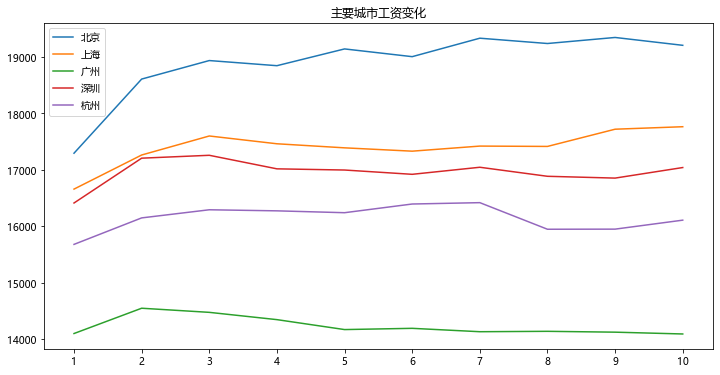

In [42]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(12,6))
cities = set(history_data.city)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("year_month","salary",data=history_data[history_data.city==city], label=city)
    
    #plt.show()
plt.xticks(list(range(1,11)))
plt.title('主要城市工资变化')
plt.legend()
plt.show()

No handles with labels found to put in legend.


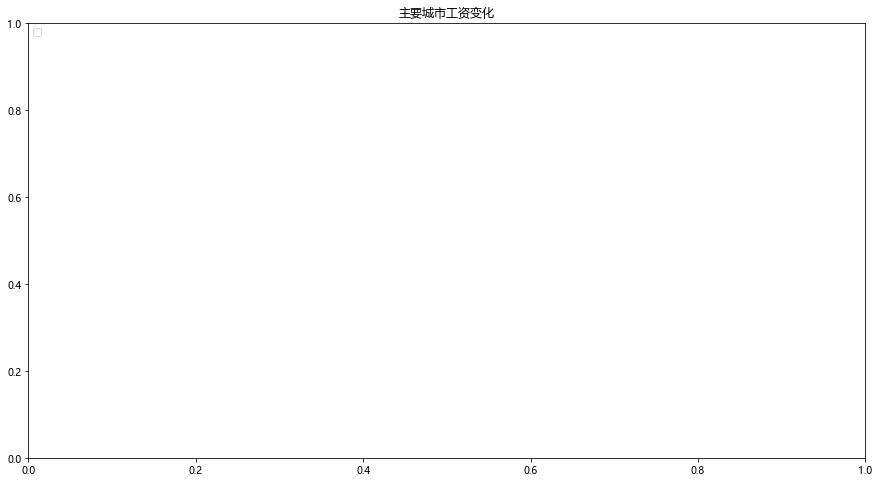

In [36]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(15,8))
cities = set(history_data.city)
#cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    
    values=history_data[history_data.city==city]['salary'].values
    if abs(values[-1]-values[-2])>500:
        print(city)
        plt.plot("year_month","salary",data=history_data[history_data.city==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend( loc='upper left')
plt.show()

In [37]:
values=history_data[history_data.city==city]['salary'].values

In [38]:
values

array([10635, 11010, 10905, 10744, 10885, 11065, 11444, 11155, 11092,
       11299], dtype=int64)